Use pca and t-sne to visiualize:


  * **[5 pt]** Iras dataset .

  * **[5 pt]** CIFAR10 dataset.

  






#IRIS Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [ ]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patheffects as PathEffects
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

In [ ]:
 # Utility function to visualize the outputs of PCA and t-SNE

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [ ]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.04163002967834473 seconds


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.92461872 0.05306648 0.01710261 0.00521218]


In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 0.9988312721252441 seconds


<ipython-input-3-930c58992273>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-24.00629, -0.4002338, '0'),
  Text(7.0273037, 2.6936884, '1'),
  Text(11.836594, -4.0276914, '2')])

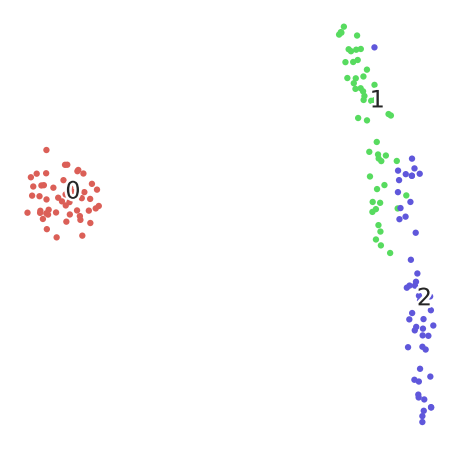

In [ ]:
fashion_scatter(fashion_tsne, y)


In [ ]:
time_start = time.time()

pca_4 = PCA(n_components=4)
pca_result_4= pca_4.fit_transform(X)

print( 'PCA with 4 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 4 principal components: {}'.format(np.sum(pca_4.explained_variance_ratio_)))

PCA with 4 components done! Time elapsed: 0.0017261505126953125 seconds
Cumulative variance explained by 4 principal components: 1.0


In [ ]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_4)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.0249037742614746 seconds


<ipython-input-3-930c58992273>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-22.613413, -2.7392726, '0'),
  Text(7.2537737, 2.697628, '1'),
  Text(14.334106, -1.6828973, '2')])

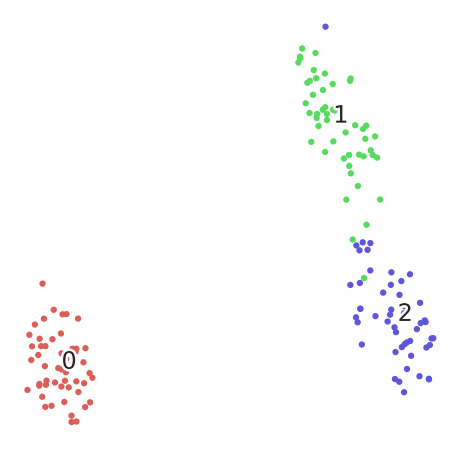

In [ ]:
fashion_scatter(fashion_pca_tsne, y)


#CIFAR_10 Dataset

In [ ]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR10 dataset
(X_train1, y_train1), (X_test1, y_test1) = cifar10.load_data()

# Reshape and normalize data
X_train1 = X_train1.reshape(-1, 32 * 32 * 3) / 255.0
X_test1 = X_test1.reshape(-1, 32 * 32 * 3) / 255.0

# Combine train and test sets
X_Cifar= np.concatenate((X_train1, X_test1))
y_Cifar = np.concatenate((y_train1, y_test1)).ravel()

In [ ]:
# Subset first 20k data points to visualize
import numpy as np
x_subset1 = X_Cifar[0:20000]
y_subset1 = y_Cifar[0:20000]

print(np.unique(y_subset1))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
from sklearn.decomposition import PCA

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(x_subset1)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 6.534777641296387 seconds


In [ ]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.29213818 0.11283454 0.0662073  0.03676102]


<ipython-input-9-930c58992273>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(5.388597818508216, 0.3576921441516536, '0'),
  Text(-1.6698715611268586, -1.7902960249350202, '1'),
  Text(-1.0580300164327032, 0.5671556787324821, '2'),
  Text(-1.8593390724806282, 1.389654019174752, '3'),
  Text(-2.777646569417713, 1.2428267236953634, '4'),
  Text(-2.410561578435915, 1.8724701883621047, '5'),
  Text(-4.202123327156315, 0.36494030417231094, '6'),
  Text(-0.3053788658730656, 0.5892124173938028, '7'),
  Text(3.6814790768415238, -2.604578885725335, '8'),
  Text(2.342386599489018, -3.5832785483837726, '9')])

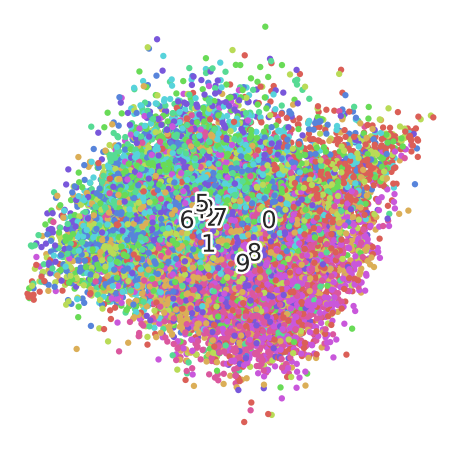

In [ ]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component
fashion_scatter(top_two_comp.values,y_subset1) # Visualizing the PCA output

In [ ]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=RS).fit_transform(x_subset1)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 372.17368483543396 seconds


<ipython-input-9-930c58992273>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(17.374447, -26.36893, '0'),
  Text(-9.768472, -3.973349, '1'),
  Text(-0.3691205, 4.453644, '2'),
  Text(3.3969011, 12.411729, '3'),
  Text(-0.92686564, 14.517079, '4'),
  Text(4.494429, 16.30008, '5'),
  Text(-8.21196, 18.088482, '6'),
  Text(2.5624552, 4.099763, '7'),
  Text(0.4898002, -30.034382, '8'),
  Text(-4.0593557, -23.503204, '9')])

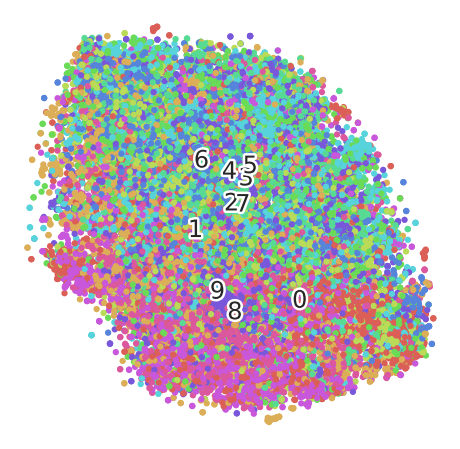

In [ ]:
fashion_scatter(fashion_tsne, y_subset1)


In [ ]:
time_start = time.time()

pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(x_subset1)

print( 'PCA with 50 components done! Time elapsed: {} seconds'.format(time.time()-time_start))

print('Cumulative variance explained by 50 principal components: {}'.format(np.sum(pca_50.explained_variance_ratio_)))

PCA with 50 components done! Time elapsed: 9.420098543167114 seconds
Cumulative variance explained by 50 principal components: 0.8438732049375051


In [ ]:
import time
time_start = time.time()


fashion_pca_tsne = TSNE(random_state=RS).fit_transform(pca_result_50)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 447.71775341033936 seconds


<ipython-input-9-930c58992273>:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(38.296864, -0.12584749, '0'),
  Text(-4.9983106, -11.875296, '1'),
  Text(-5.216264, 4.8345337, '2'),
  Text(-11.501906, 9.841424, '3'),
  Text(-17.72681, 8.152751, '4'),
  Text(-16.191816, 13.586213, '5'),
  Text(-25.319532, 1.8492798, '6'),
  Text(-0.1349789, 3.7172468, '7'),
  Text(33.279655, -17.133783, '8'),
  Text(20.18802, -22.371544, '9')])

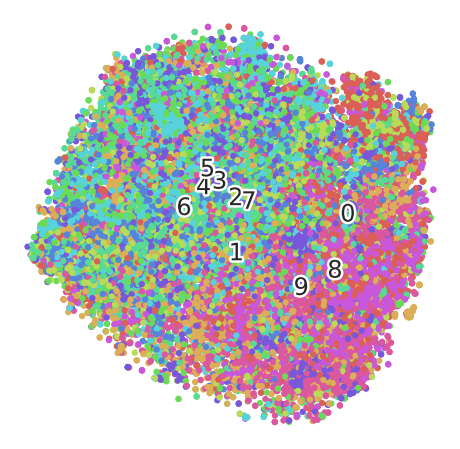

In [ ]:
fashion_scatter(fashion_pca_tsne, y_subset1)
